In [49]:
#Librerias Necesarias para correr el código

library("plot3D")
library("gsl")
library('heavy')


In [50]:
#Código para generar el plot

nlon = 200;    # number of longitude points
nlat = 200;    # number of latitude points

phi = seq(0,2*pi,length=nlon);
theta = seq(0,pi,length=nlat);

coord = expand.grid(phi,theta);  
x = sin(coord[,2])*cos(coord[,1]);
y = sin(coord[,2])*sin(coord[,1]);
z = cos(coord[,2]);
num = length(x);

# Numero de terminos para truncar la serie

Ntrunc = 30;     


In [51]:
## Multiquadric model 

## Parametros Delta
Delta = matrix(c
               (0.5,0.1,
                0.1,0.5)
        ,2,2)
rho   = matrix(c
               (1,0.5,
                0.5,1)
        ,2,2)

In [52]:
suma1 = array(dim=c(num,1),0);
suma2 = array(dim=c(num,1),0);

In [53]:
for(n in 0:Ntrunc){
    
## Definimos la matriz B de densidades espectrales ##
bn = matrix(c(
    rho[1,1]*(1-Delta[1,1])*Delta[1,1]^n,rho[1,2]*(1-Delta[1,2])*Delta[1,2]^n,
    rho[2,1]*(1-Delta[2,1])*Delta[2,1]^n,rho[2,2]*(1-Delta[1,1])*Delta[2,2]^n
    ),2,2)
       
fact = t(chol(bn)) ; 
coef = fact%*%t(rmnorm(1,Sigma=matrix(c(1,0,0,1), ncol = 2)))
  suma1  <-  suma1  + coef[1]*legendre_sphPlm(n,0,cos(coord[,2]))  ;
  suma2  <-  suma2  + coef[2]*legendre_sphPlm(n,0,cos(coord[,2]))  ;
     if(n>0){
        for(j in 1:n){
           coef1 = fact%*%t(rmnorm(1,Sigma=matrix(c(1,0,0,1), ncol = 2))) 
           coef2 = fact%*%t(rmnorm(1,Sigma=matrix(c(1,0,0,1), ncol = 2)))

           ynm1 = legendre_sphPlm(n,j,cos(coord[,2])) * (  coef1[1]*cos(j*coord[,1]) +
                                                            coef2[1]*sin(j*coord[,1])  );
           suma1 <- suma1 +  sqrt(2)*ynm1;
            
           ynm2 = legendre_sphPlm(n,j,cos(coord[,2])) * (  coef1[2]*cos(j*coord[,1]) +
                                                            coef2[2]*sin(j*coord[,1])  );
           suma2 <- suma2 +  sqrt(2)*ynm2;
        }
     }
}


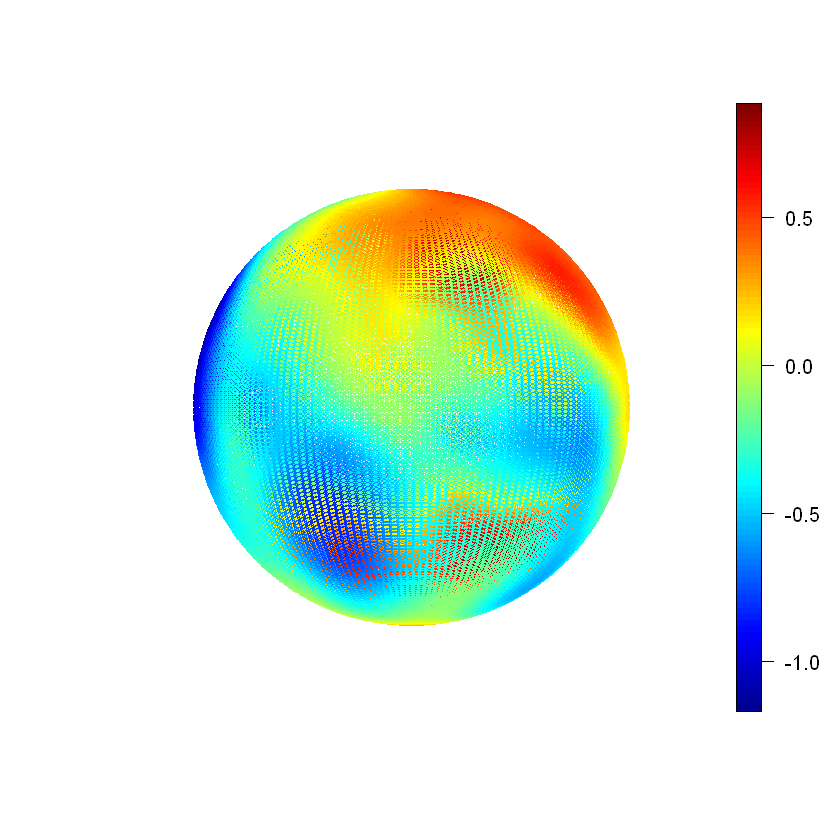

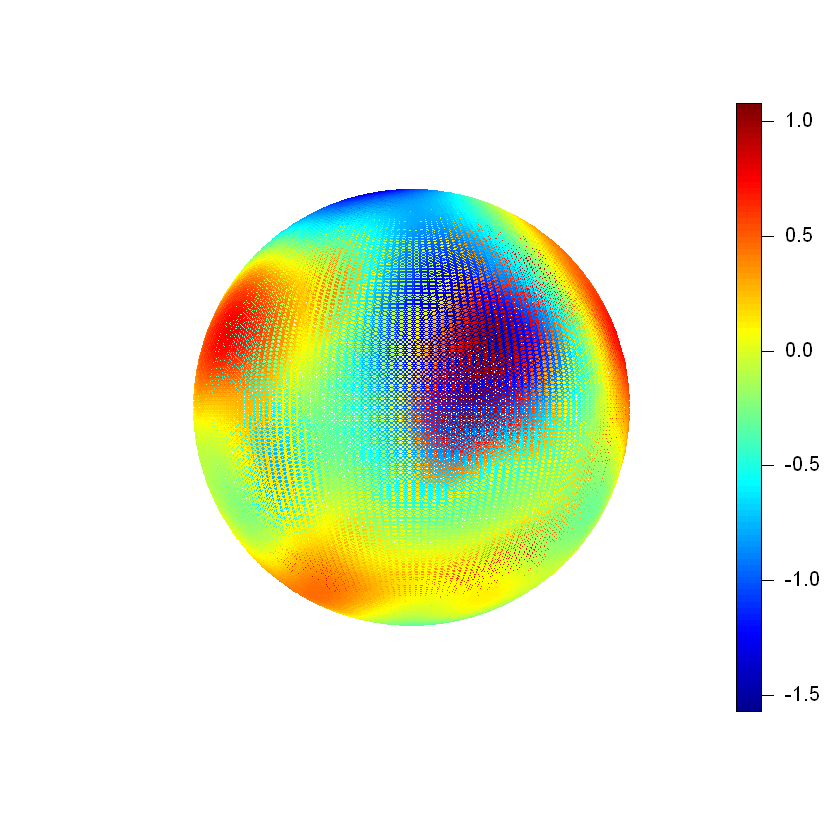

In [54]:
## Realizamos los plot de los dos procesos que tienen relación

scatter3D(x,y,z,colvar=suma1,theta=0,phi=0,box=F); 
scatter3D(x,y,z,colvar=suma2,theta=0,phi=0,box=F);


In [55]:
# Coherencia
densidad_b_11 = function(n) rho[1,1]*(1-Delta[1,1])*Delta[1,1]^n
densidad_b_12 = function(n) rho[1,2]*(1-Delta[1,2])*Delta[1,2]^n
densidad_b_22 = function(n) rho[2,2]*(1-Delta[2,2])*Delta[2,2]^n

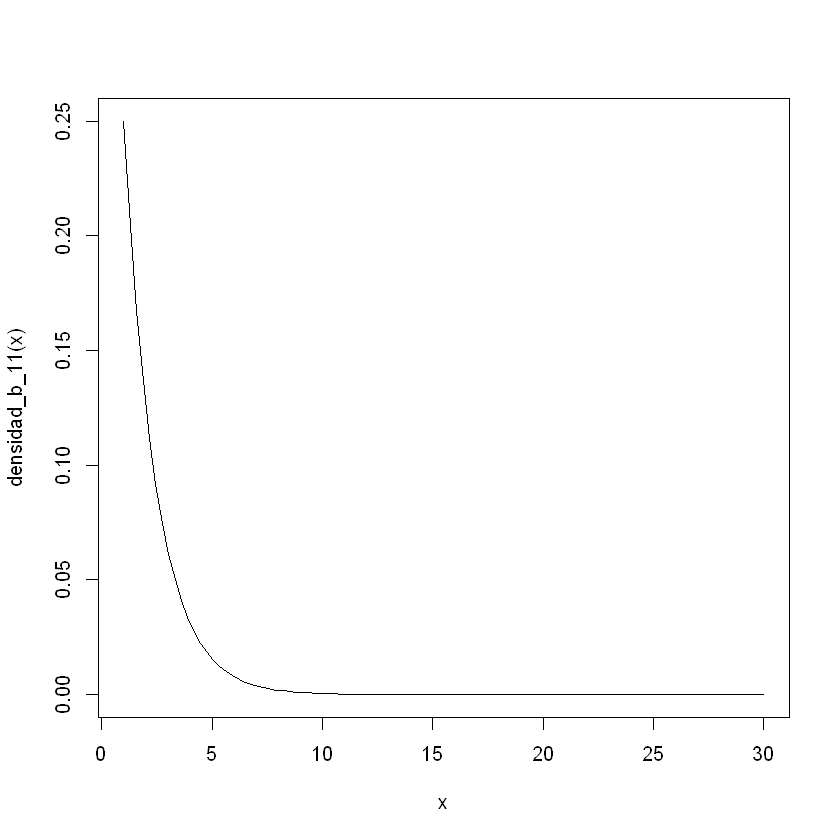

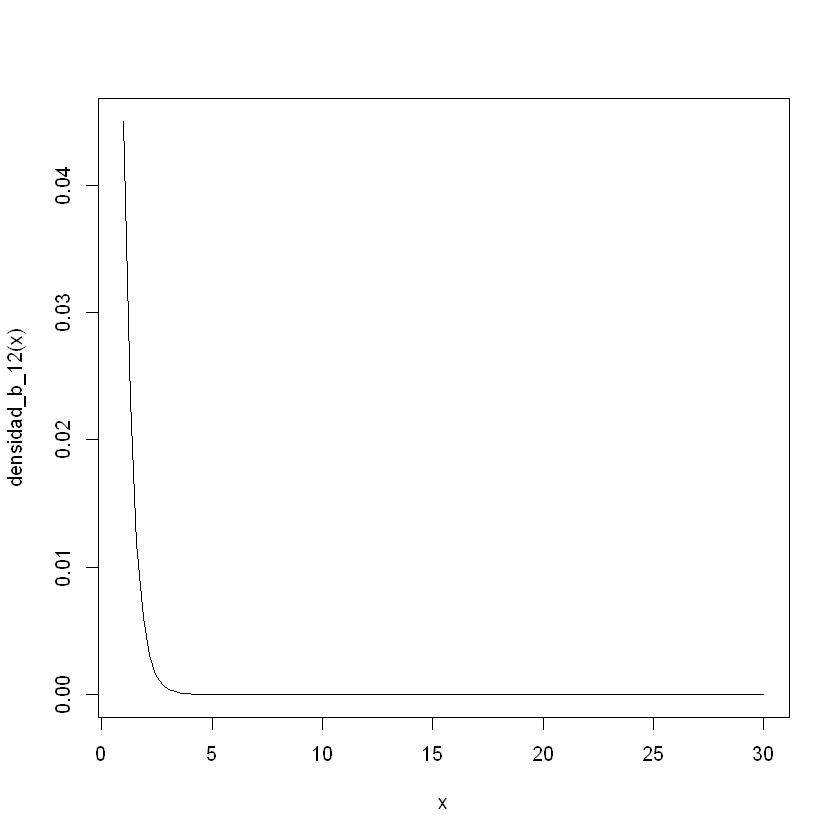

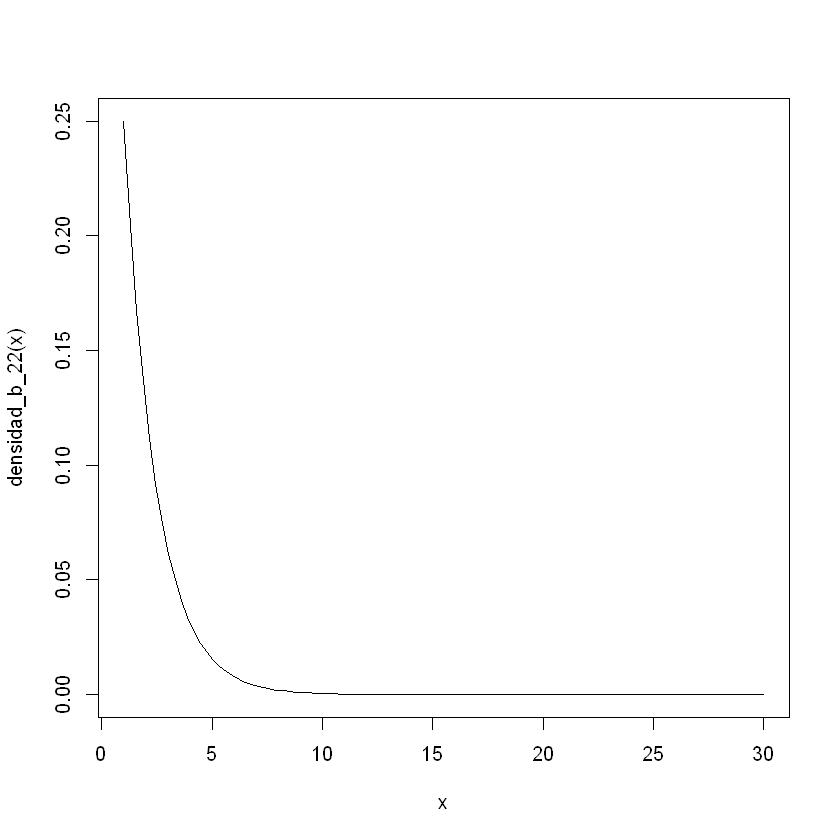

In [56]:
curve(densidad_b_11,n)
curve(densidad_b_12,n)
curve(densidad_b_22,n)

In [57]:
coherencia = function(n) rho[1,2]*(1-Delta[1,2])*Delta[1,2]^n /
    sqrt(rho[1,1]*(1-Delta[1,1])*Delta[1,1]^n*rho[2,2]*(1-Delta[2,2])*Delta[2,2]^n)

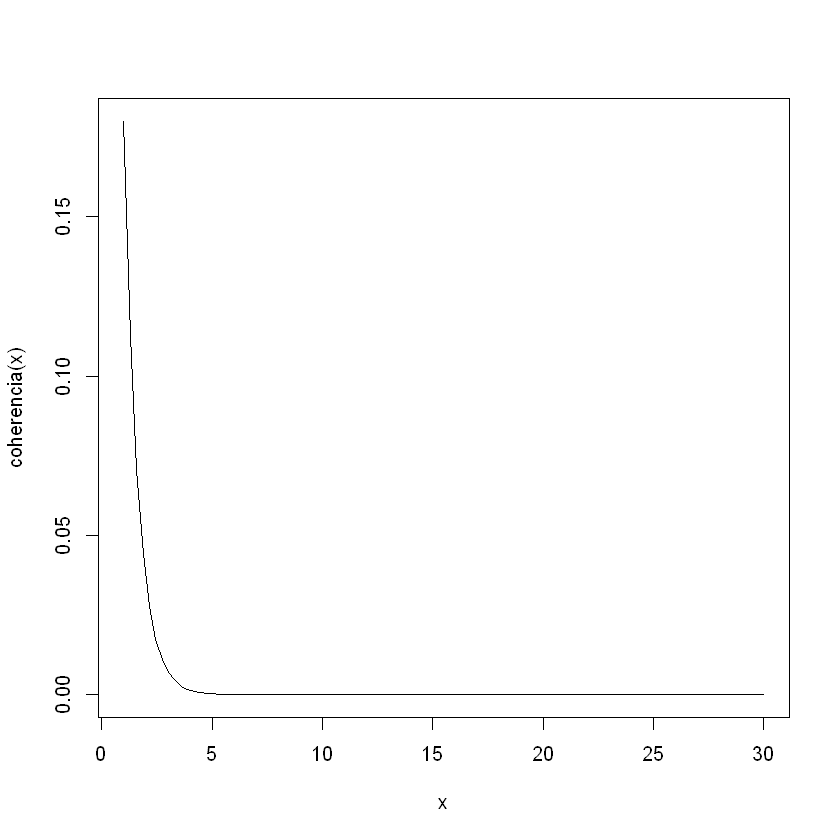

In [58]:
curve(coherencia,n)

In [59]:
# Circular-Mat ́ern model

# Parametros
Alpha = matrix(c
               (1,0.5,
                0.5,1)
        ,2,2)

nu = 0.2
S_coef = matrix(c
               (0,0,
                0,0)
        ,2,2)

In [60]:
for(l in 0:Ntrunc){
    S_coef = S_coef + matrix(c
               (1/(l^2 + Alpha[1,1]^2)^(nu+0.5),1/(l^2 + Alpha[1,2]^2)^(nu+0.5),
                1/(l^2 + Alpha[2,1]^2)^(nu+0.5),1/(l^2 + Alpha[2,2]^2)^(nu+0.5))
        ,2,2)
}

In [61]:
for(n in 0:Ntrunc){
    
## Definimos la matriz B de densidades espectrales ##
bn = matrix(c(
    rho[1,1]*(1/(S_coef[1,1]*(n^2+Alpha[1,1]^2))^(nu+0.5)),rho[1,2]*(1/(S_coef[1,2]*(n^2+Alpha[1,2]^2))^(nu+0.5)),
    rho[2,1]*(1/(S_coef[2,1]*(n^2+Alpha[2,1]^2))^(nu+0.5)),rho[2,2]*(1/(S_coef[2,2]*(n^2+Alpha[2,2]^2))^(nu+0.5))
    ),2,2)
       
fact = t(chol(bn)) ; 
coef = fact%*%t(rmnorm(1,Sigma=matrix(c(1,0,0,1), ncol = 2)))
  suma1  <-  suma1  + coef[1]*legendre_sphPlm(n,0,cos(coord[,2]))  ;
  suma2  <-  suma2  + coef[2]*legendre_sphPlm(n,0,cos(coord[,2]))  ;
     if(n>0){
        for(j in 1:n){
           coef1 = fact%*%t(rmnorm(1,Sigma=matrix(c(1,0,0,1), ncol = 2))) 
           coef2 = fact%*%t(rmnorm(1,Sigma=matrix(c(1,0,0,1), ncol = 2)))

           ynm1 = legendre_sphPlm(n,j,cos(coord[,2])) * (  coef1[1]*cos(j*coord[,1]) +
                                                            coef2[1]*sin(j*coord[,1])  );
           suma1 <- suma1 +  sqrt(2)*ynm1;
            
           ynm2 = legendre_sphPlm(n,j,cos(coord[,2])) * (  coef1[2]*cos(j*coord[,1]) +
                                                            coef2[2]*sin(j*coord[,1])  );
           suma2 <- suma2 +  sqrt(2)*ynm2;
        }
     }
}


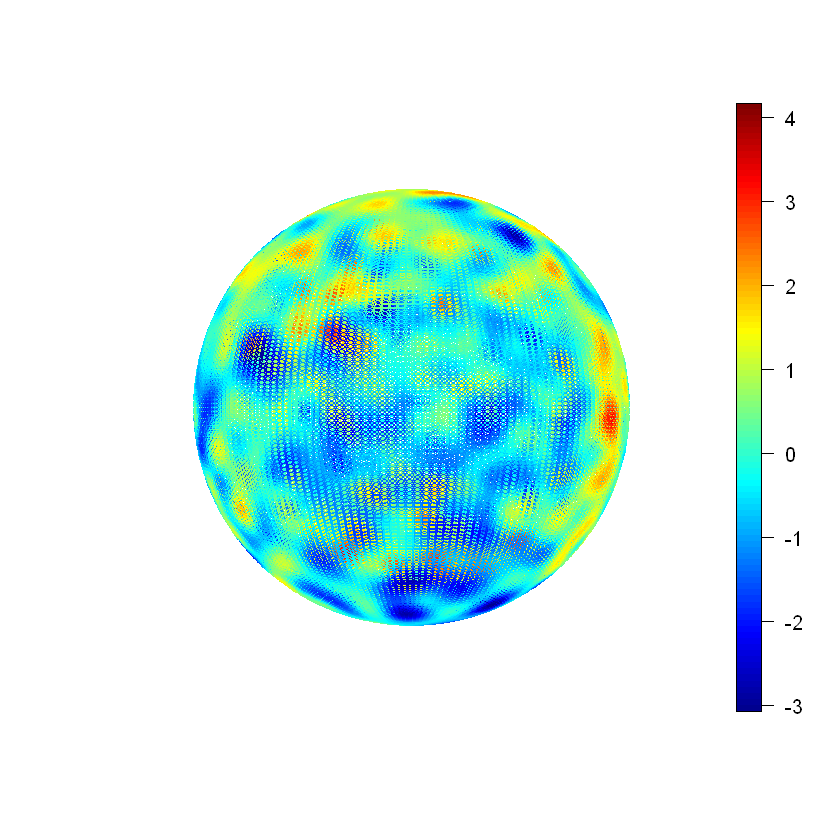

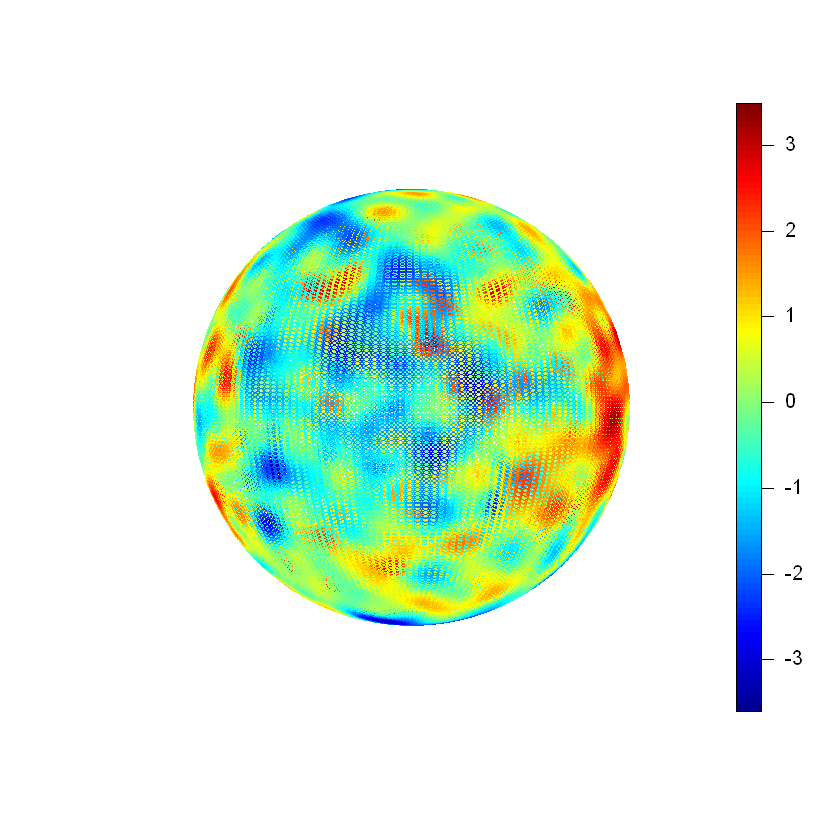

In [62]:
## Realizamos los plot de los dos procesos que tienen relación

scatter3D(x,y,z,colvar=suma1,theta=0,phi=0,box=F); 
scatter3D(x,y,z,colvar=suma2,theta=0,phi=0,box=F);


In [63]:
# Coherencia
densidad_b_11 = function(n) rho[1,1]*(1/(S_coef[1,1]*(n^2+Alpha[1,1]^2))^(nu+0.5))
densidad_b_12 = function(n) rho[1,2]*(1/(S_coef[1,2]*(n^2+Alpha[1,2]^2))^(nu+0.5))
densidad_b_22 = function(n) rho[2,2]*(1/(S_coef[2,2]*(n^2+Alpha[2,2]^2))^(nu+0.5))

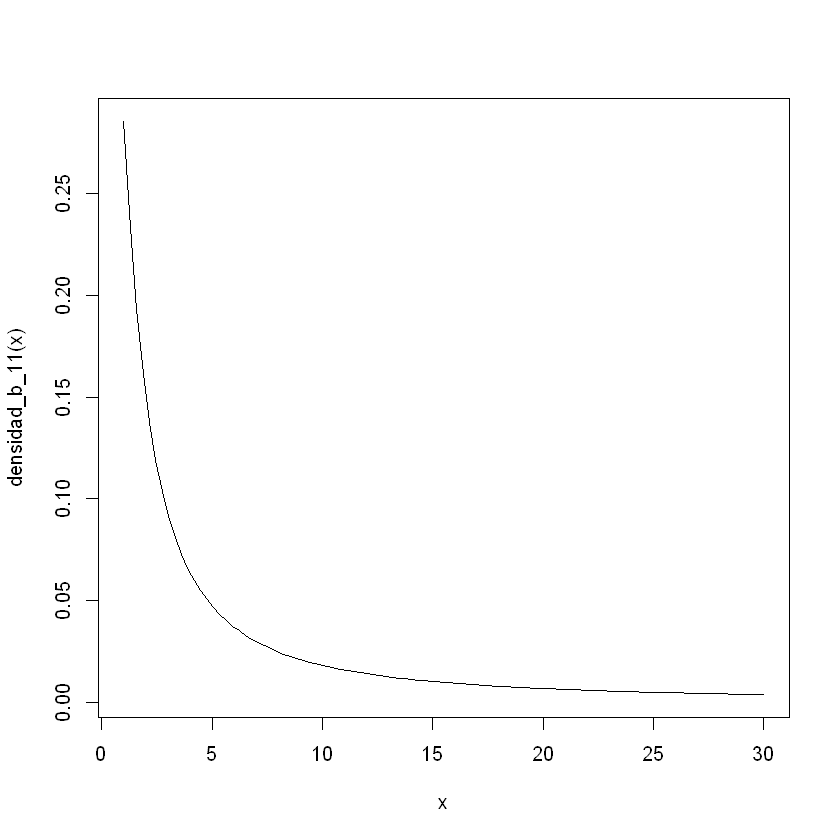

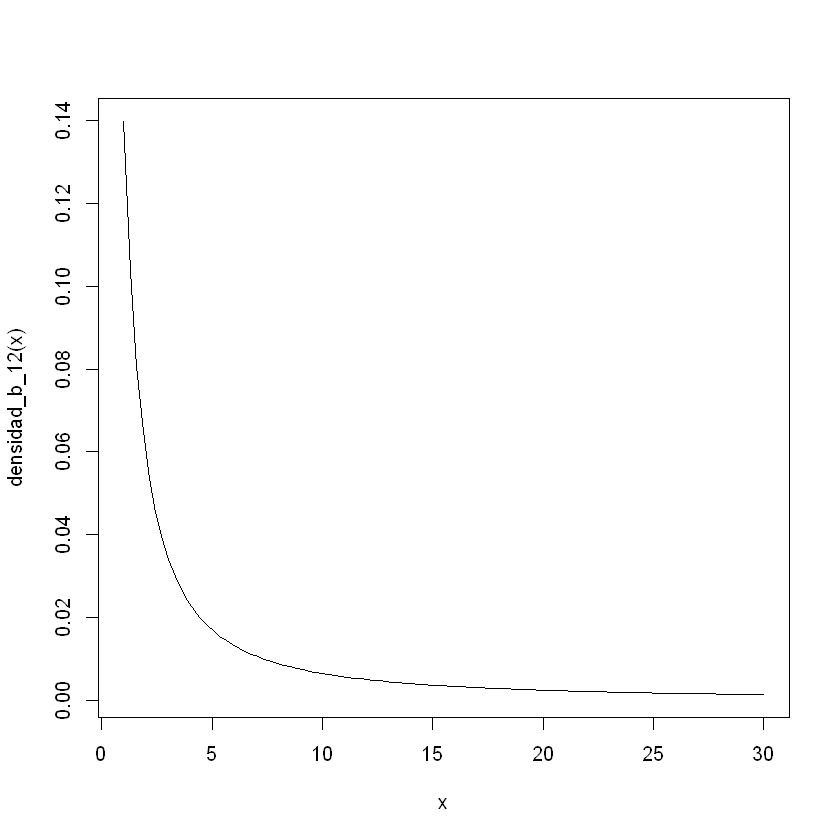

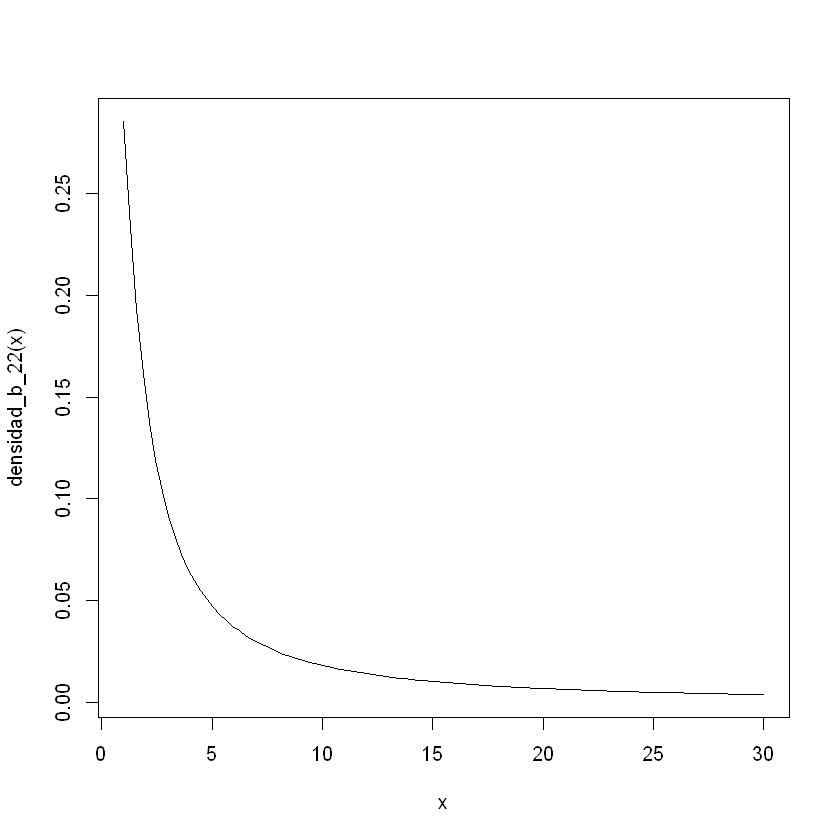

In [64]:
curve(densidad_b_11,n)
curve(densidad_b_12,n)
curve(densidad_b_22,n)

In [65]:
coherencia  = function(n)
    rho[1,2]*(1/(S_coef[1,2]*(n^2+Alpha[1,2]^2))^(nu+0.5)) / 
    sqrt(rho[1,1]*(1/(S_coef[1,1]*(n^2+Alpha[1,1]^2))^(nu+0.5))*rho[2,2]*(1/(S_coef[2,2]*(n^2+Alpha[2,2]^2))^(nu+0.5)))

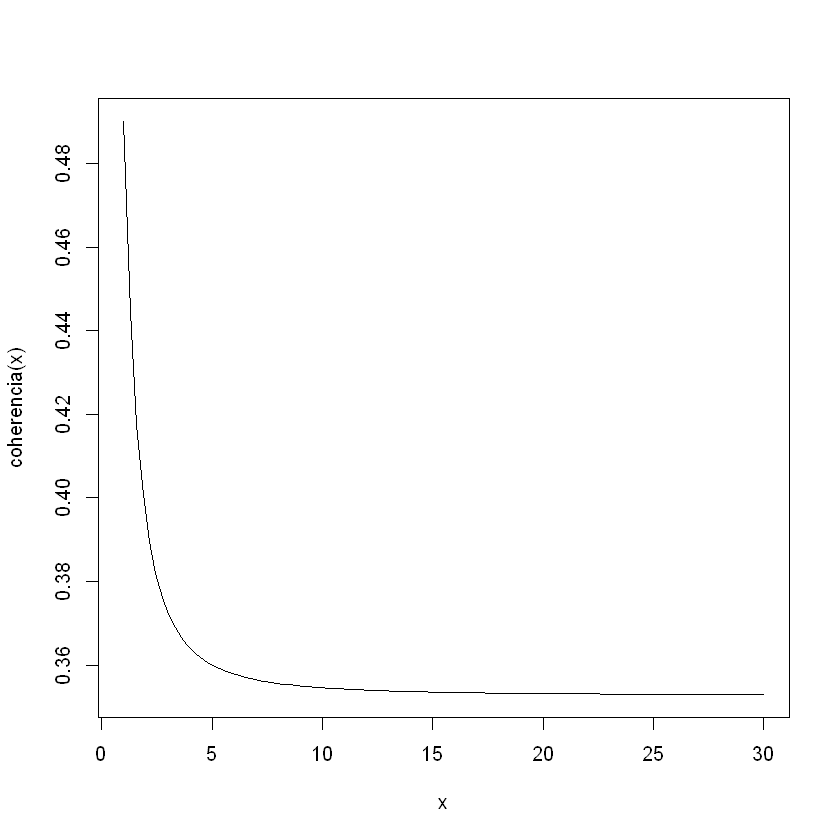

In [75]:
curve(coherencia,n)